In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import xgboost as xgb

%matplotlib inline

In [2]:
def read_data(fn):
    data = pd.read_csv(fn)
    data["Dates"] = ""
    data["time_rs"] = 0.0

    for i in range(data.shape[0]):
        dt = datetime.fromtimestamp(data.iloc[i]['timestamp'] // 1000)
        data.at[i, 'Dates'] = dt

        m = (data.iloc[i]['sunset'] + data.iloc[i]['sunrise']) // 2

        if data.iloc[i]['timestamp'] < m:
            time_rs = (data.iloc[i]['timestamp'] - data.iloc[i]['sunrise']) / \
            (m - data.iloc[i]['sunrise'])
        else:
            time_rs = (data.iloc[i]['sunset'] - data.iloc[i]['timestamp']) / \
            (data.iloc[i]['sunset'] - m)

        data.at[i, 'time_rs'] = time_rs

    data = data.set_index('Dates')
    data = data.drop(['timestamp','sunrise','sunset'], axis=1) 

    cols = list(data.columns)
    a, b = cols.index('pwr'), cols.index('time_rs')
    cols[b], cols[a] = cols[a], cols[b]
    data = data[cols]
    
    return data

In [10]:
df = read_data('all_owm.csv')

data_X = df.drop('pwr', axis = 1)
data_Y = df.pwr

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=7)

In [11]:
regr = xgb.XGBRegressor(
    n_estimators=220,
    reg_lambda=20,
    gamma=0,
    max_depth=3,
    learning_rate=0.2
)
regr.fit(X_train, y_train)

y_train_hat = regr.predict(X_train)
y_test_hat = regr.predict(X_test)

print("Error metrics of training data")

RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_train, y_train_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_train, y_train_hat)
print('Variance score: %.2f' % R2 )

print("Error metrics of test data")

RMSE = np.sqrt(mean_squared_error(y_test, y_test_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_test, y_test_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_test, y_test_hat)
print('Variance score: %.2f' % R2 )

Error metrics of training data
RMSE or Root mean squared error: 14.59
Mean Absolute Error: 8.81
Variance score: 0.89
Error metrics of test data
RMSE or Root mean squared error: 15.97
Mean Absolute Error: 9.69
Variance score: 0.86


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

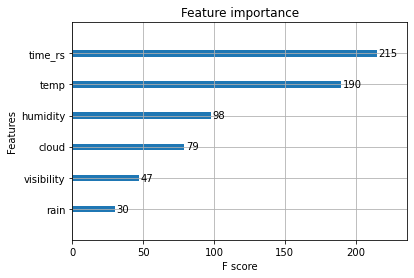

In [5]:
xgb.plot_importance(regr)

In [6]:
df = read_data('all_owm.csv')

# Creating the lag variables
for i in range(72,96):
    df['lag'+str(i)] = df['pwr'].shift(i)
    
df_lag = df.dropna()

data_X = df_lag.drop('pwr', axis = 1)
data_Y = df_lag.pwr

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=7)

In [7]:
regr = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3,
    learning_rate=0.2
)
regr.fit(X_train, y_train)

y_train_hat = regr.predict(X_train)
y_test_hat = regr.predict(X_test)

print("Error metrics of training data")

RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_train, y_train_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_train, y_train_hat)
print('Variance score: %.2f' % R2 )

print("Error metrics of test data")

RMSE = np.sqrt(mean_squared_error(y_test, y_test_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_test, y_test_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_test, y_test_hat)
print('Variance score: %.2f' % R2 )

Error metrics of training data
RMSE or Root mean squared error: 10.88
Mean Absolute Error: 5.84
Variance score: 0.94
Error metrics of test data
RMSE or Root mean squared error: 13.86
Mean Absolute Error: 7.12
Variance score: 0.90


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

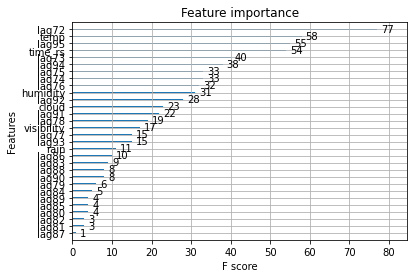

In [8]:
xgb.plot_importance(regr)